# Monte Carlo Solution

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import pandas as pd

random.seed(101)

## Coordinates and distance matrix generation

In [2]:
def generate_coordinates(num_cities, x_range=(0, 100), y_range=(0, 100)):
    return [(random.uniform(*x_range), random.uniform(*y_range)) for _ in range(num_cities)]

def compute_distance_matrix(coords):
    num_cities = len(coords)
    matrix = [[0]*num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            dist = math.dist(coords[i], coords[j])
            matrix[i][j] = matrix[j][i] = dist
    return matrix

## Helper Functions

In [3]:
def calculate_tour_length(path, distance_matrix):
    length = 0
    for i in range(len(path) - 1):
        length += distance_matrix[path[i]][path[i + 1]]
    length += distance_matrix[path[-1]][path[0]]  # powrót do miasta startowego
    return length


def plot_tsp(coords, path, filename=None):
    x = [coords[i][0] for i in path]
    y = [coords[i][1] for i in path]

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', label='Monte Carlo Path', color='blue')

    for i, (xi, yi) in enumerate(coords):
        plt.scatter(xi, yi, color='black', zorder=3)
        plt.text(xi + 0.5, yi + 0.5, str(i), fontsize=9)

    start_idx = path[0]
    plt.scatter([coords[start_idx][0]], [coords[start_idx][1]], color='green', s=100, label='Start', zorder=4)

    plt.title("TSP - Monte Carlo Solution")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

    if filename:
        plt.savefig(filename, dpi=100, bbox_inches='tight')
    plt.show()

# Monte Carlo Algorithm Implementation

In [4]:
def monte_carlo_tsp(distance_matrix, iterations=10000):
    num_cities = len(distance_matrix)
    best_path = None
    best_cost = float('inf')

    for _ in range(iterations):
        path = list(range(num_cities))
        random.shuffle(path)
        cost = calculate_tour_length(path, distance_matrix)
        if cost < best_cost:
            best_cost = cost
            best_path = path[:]
    
    best_path.append(best_path[0])  # zamknięcie cyklu
    return best_path, best_cost


## Batch Experiments (10–100 cities, 100 trials each)

In [6]:
trials_per_size = 100
iterations = 10000  
results = []
seed=101

for num_cities in range(10, 101, 1):
    times = []
    lengths = []

    for trial in range(trials_per_size):
        random.seed(seed)
        seed += 1

        coords = generate_coordinates(num_cities)
        distance_matrix = compute_distance_matrix(coords)

        start_time = time.time()
        path, cost = monte_carlo_tsp(distance_matrix, iterations=iterations)
        end_time = time.time()

        new_row = {
        "Number of Cities": num_cities,
        "Total Length": cost,
        "Time (s)": end_time - start_time
        }
        print(new_row)
        results.append(new_row)

    #     times.append(end_time - start_time)
    #     lengths.append(cost)

    # results.append({
    #     "Number of Cities": num_cities,
    #     "Avg Total Length": sum(lengths) / trials_per_size,
    #     "Avg Time (s)": sum(times) / trials_per_size
    # })

df = pd.DataFrame(results)
df
# df.to_csv("monte_carlo_tsp_avg_results.csv", index=False)


{'Number of Cities': 10, 'Total Length': 356.58703619549874, 'Time (s)': 0.08204102516174316}
{'Number of Cities': 10, 'Total Length': 246.9736335995621, 'Time (s)': 0.08299446105957031}
{'Number of Cities': 10, 'Total Length': 321.2892384385152, 'Time (s)': 0.08324265480041504}
{'Number of Cities': 10, 'Total Length': 344.15331375407663, 'Time (s)': 0.07428550720214844}
{'Number of Cities': 10, 'Total Length': 310.93505468028116, 'Time (s)': 0.08148407936096191}
{'Number of Cities': 10, 'Total Length': 349.06655192800486, 'Time (s)': 0.08338141441345215}
{'Number of Cities': 10, 'Total Length': 331.8446434359985, 'Time (s)': 0.07363390922546387}
{'Number of Cities': 10, 'Total Length': 343.67143606240205, 'Time (s)': 0.07579255104064941}
{'Number of Cities': 10, 'Total Length': 270.2890713196063, 'Time (s)': 0.08260297775268555}
{'Number of Cities': 10, 'Total Length': 267.6449157380663, 'Time (s)': 0.07472085952758789}
{'Number of Cities': 10, 'Total Length': 246.62258286684425, 'Tim

,Number of Cities,Total Length,Time (s)
0,10,356.587036,0.082041
1,10,246.973634,0.082994
2,10,321.289238,0.083243
3,10,344.153314,0.074286
4,10,310.935055,0.081484
...,...,...,...
9095,100,4265.003526,0.699090
9096,100,4151.606505,0.584297
9097,100,4288.428409,0.564503
9098,100,4422.295785,0.628461


In [7]:
df.to_csv("mc_tsp_results.csv", index=False)

## Plotting Results: Execution Time and Tour Length

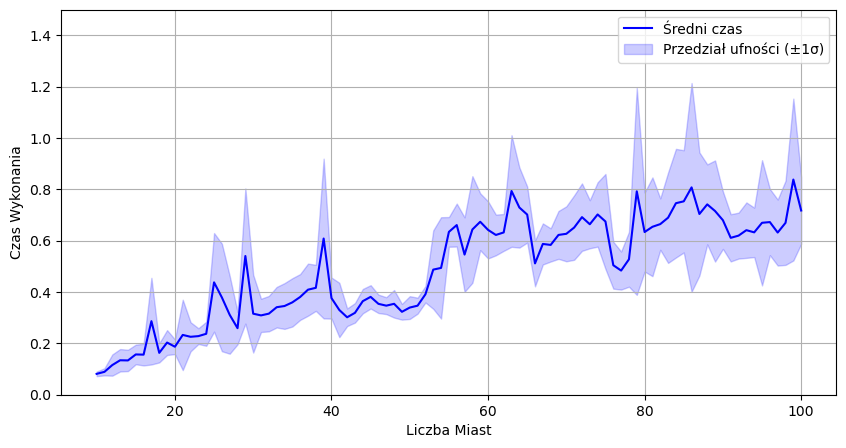

In [22]:
grouped = df.groupby("Number of Cities")["Time (s)"]
mean_time = grouped.mean()
std_time = grouped.std()

# X i Y
x = mean_time.index
y = mean_time.values
yerr = std_time.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średni czas", color='blue')
plt.fill_between(x, y - yerr, y + yerr, color='blue', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Czas Wykonania a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Czas Wykonania")
plt.grid(True)
plt.legend()
# plt.ylim(0, 10)
# plt.savefig(".\images\mc_tsp_time.png", dpi=100, bbox_inches='tight')
plt.ylim(0, 1.5)
plt.savefig(".\images\mc_tsp_time_scaled.png", dpi=100, bbox_inches='tight')
plt.show()


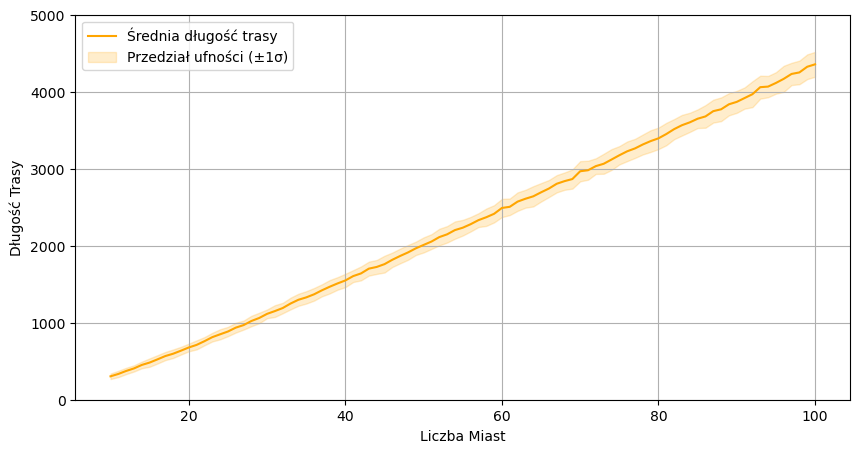

In [10]:
grouped = df.groupby("Number of Cities")["Total Length"]
mean_length = grouped.mean()
std_length = grouped.std()

# X i Y
x = mean_length.index
y = mean_length.values
yerr = std_length.values

# Wykres
plt.figure(figsize=(10, 5))
plt.plot(x, y, label="Średnia długość trasy", color='orange')
plt.fill_between(x, y - yerr, y + yerr, color='orange', alpha=0.2, label="Przedział ufności (±1σ)")

# plt.title("Całkowita Długość Trasy a Liczba Miast")
plt.xlabel("Liczba Miast")
plt.ylabel("Długość Trasy")
plt.grid(True)
plt.legend()
plt.ylim(0, 5000)
plt.savefig(".\images\mc_tsp_length.png", dpi=100, bbox_inches='tight')
plt.show()


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Time (s)"], marker='o')
plt.title("Average Execution Time vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Time (seconds)")
plt.grid(True)
plt.savefig("mc_tsp_avg_time.png", dpi=100, bbox_inches='tight')

plt.figure(figsize=(10, 5))
plt.plot(df["Number of Cities"], df["Avg Total Length"], marker='o', color='orange')
plt.title("Total length vs Number of Cities")
plt.xlabel("Number of Cities")
plt.ylabel("Avg Tour Length")
plt.grid(True)
plt.savefig("mc_tsp_avg_length.png", dpi=100, bbox_inches='tight')


### Example: Best Tour for 25 Cities

Path: [16, 4, 15, 8, 11, 6, 17, 7, 12, 5, 19, 3, 24, 14, 13, 10, 18, 0, 1, 22, 21, 20, 9, 2, 23, 16]
Total cost: 821.4264354622736
Time taken: 2.962233 seconds


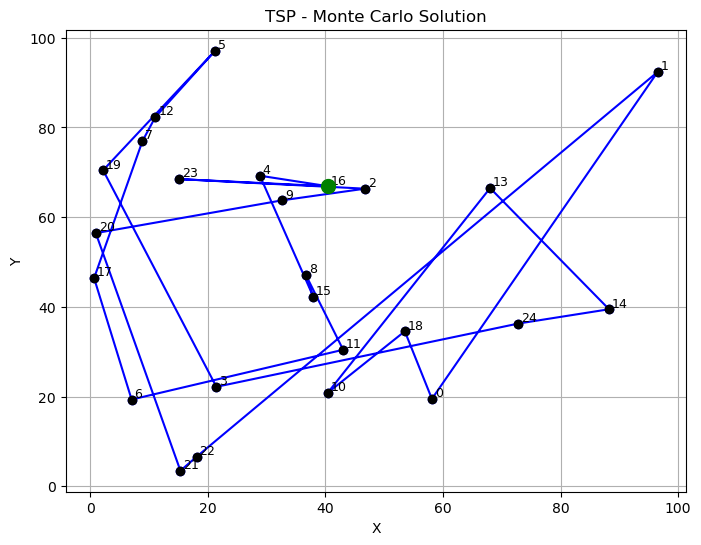

In [19]:
num_cities = 25
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = monte_carlo_tsp(distance_matrix, iterations=100000)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename=r".\images\25_MC.png")


## Example: Best Tour for 50 cities

Path: [48, 40, 32, 18, 35, 21, 29, 6, 9, 0, 25, 38, 45, 1, 28, 13, 26, 46, 43, 7, 41, 39, 27, 36, 34, 33, 49, 14, 31, 47, 10, 19, 23, 12, 20, 3, 30, 22, 11, 24, 17, 5, 2, 42, 15, 37, 8, 4, 44, 16, 48]
Total cost: 1992.536247102312
Time taken: 24.243375 seconds


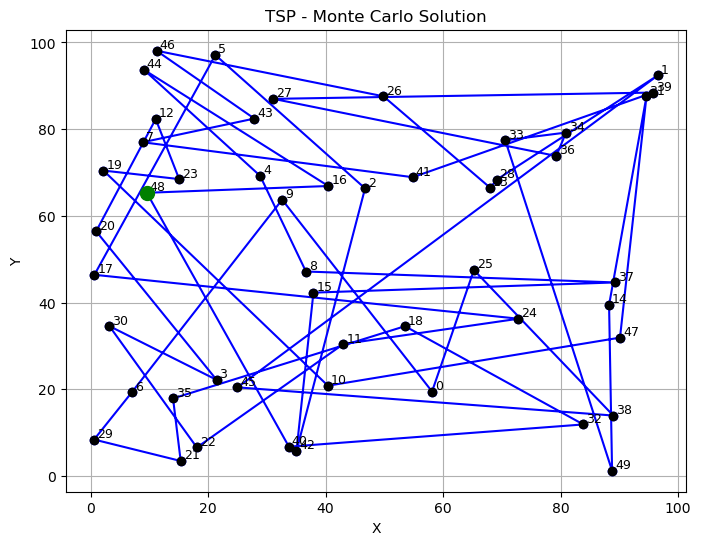

In [18]:
num_cities = 50
random.seed(101)
coords = generate_coordinates(num_cities)
distance_matrix = compute_distance_matrix(coords)

start_time = time.time()
path, cost = monte_carlo_tsp(distance_matrix, iterations=500000)
end_time = time.time()

print("Path:", path)
print("Total cost:", cost)
print("Time taken: {:.6f} seconds".format(end_time - start_time))

plot_tsp(coords, path, filename=r".\images\50_MC.png")
